### News Scraping

In [25]:
"""
Created on Sun Jun 28 20:45:50 2020
@author: SHAAF ABDULLAH
"""
import urllib
import pandas as pd
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from time import sleep
import datetime
stock_time=datetime.datetime.now()
date=datetime.datetime.now().date()
day=date.day
month=date.month
fileName = "dawn_simple.csv"
f = open(fileName,"w")
headers = "headline, date\n"
f.write(headers)
for year in range(2020,2021):
    for month in range(month,month+1):
        for day in range(day-2,day+1):
            if(month < 9 and day > 9):
                url_to_scrape = "https://www.dawn.com/archive/"+str(year)+"-0"+str(month)+"-"+str(day)+"/"
            elif(month>9 and day < 9):
                url_to_scrape = "https://www.dawn.com/archive/"+str(year)+"-"+str(month)+"-0"+str(day)+"/"
            elif(month<9 and day <9):
                url_to_scrape = "https://www.dawn.com/archive/"+str(year)+"-0"+str(month)+"-0"+str(day)+"/" 
            else:
                url_to_scrape = "https://www.dawn.com/archive/"+str(year)+"-"+str(month)+"-"+str(day)+"/"
                
            try: 
                #create connection with url
                client_page = uReq(url_to_scrape)
                sleep(2)
            except urllib.error.HTTPError as e:
                if e.getcode() == 404: # check the return code
                    continue
            page_html = client_page.read()
            client_page.close()
            #parse html recieved
            page_soup = soup(page_html,"html.parser") 
            
            #retrieving top stories from parsed html 
            top_stories = page_soup.find_all("article",{"data-layout":"story"})
            
            for news in top_stories:
        
                headline = news.h2.text
                headline.encode("utf-8")
                try:
                    date = (news.find_all("span",{"class":"timeago"}))[0].text
                    date.encode("utf-8")
                except:
                    break
                headline = headline.replace(","," ")
                headline = headline.replace("\n"," ")
                f.write(headline+","+date.replace(","," ")+"\n")
f.close()


TypeError: 'DataFrame' object is not callable

### REAL TIME STOCK DATA

In [2]:
"""
Created on Sun Jul 12 17:51:32 2020
@author: SHAAFABDULLAH
"""
from bs4 import BeautifulSoup as soup
import requests
news_time=datetime.datetime.now()
fileName = "psx_scraping.csv"
f = open(fileName,"w")
headers = "SCRIP, LDCP, OPEN, HIGH, LOW, CURRENT, CHANGE, VOLUME, ""\n"
f.write(headers)
url_to_scrape = "https://www.psx.com.pk/market-summary/"

try:
    client_page = requests.get(url_to_scrape)
except:
    print("Request aborted due to unknown reason!")

page_html = client_page.text
client_page.close()
#parse html recieved
page_soup = soup(page_html,"html.parser") 
#retrieving tables from parsed html 
tables = page_soup.find_all("table")

for table in tables[1:(len(tables)-1)]:
        rows=table.find_all("tr")[1:]
        for row in rows[1:]:
            
            columns = row.find_all("td")[:]
            for column in columns:
                data = column.text
                data = data.replace(","," ")
                data = data.replace("\n"," ")
                f.write(data+", ")
            f.write("\n")
f.close()

### SCRAPED DATA PREPROCESSING

In [3]:
print('TIME NEWS DATA UPDATED: ')
print(news_time)
News=pd.read_csv('dawn_simple.csv',encoding='iso-8859-1' )
News[:]

TIME NEWS DATA UPDATED: 
2020-07-16 08:00:33.882694


,headline,date
0,The death penalty around the world,14 Jul 2020 10:05pm
1,3 soldiers martyred in firing by terrorists in...,14 Jul 2020 09:40pm
2,FM Qureshi discharged from hospital after 10 d...,14 Jul 2020 08:25pm
3,US carries out the first federal execution in ...,14 Jul 2020 07:51pm
4,Cable operators protest KE's 'stubbornness' by...,14 Jul 2020 09:36pm
...,...,...
126,Govt slammed for failing to manage KE affairs,15 Jul 2020 08:55am
127,CAA clears licences of 55 pilots working in Qa...,15 Jul 2020 08:37am
128,Govt plans to restrict use of foreign satellites,15 Jul 2020 08:39am
129,Iran drops India from key Chabahar project,15 Jul 2020 08:37am


In [4]:
News.columns=['Headlines','Date']
News['Date'] = pd.to_datetime(News['Date']).dt.date
News=News.groupby(['Date']).agg(lambda col: ','.join(col))


In [5]:
print('TIME STOCK DATA UPDATED: ')
print(stock_time)
Data=pd.read_csv('psx_scraping.csv')
Data[:]

TIME STOCK DATA UPDATED: 
2020-07-16 08:00:22.553432


,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME,
0,Al-Ghazi Tractors Limited.,358.53,356.00,356.00,350.00,352.51,-6.02,1 600,
1,Atlas Honda Limited.,392.00,390.00,392.00,390.00,392.00,0.00,200,
2,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,6.09,6.20,6.20,5.86,5.99,-0.10,436 000,
3,Ghandhara Industries Ltd.,143.88,143.98,154.67,143.60,154.67,10.79,2 037 900,
4,Ghandhara Nissan Ltd.,69.26,69.30,74.45,69.30,73.20,3.94,4 625 000,
...,...,...,...,...,...,...,...,...,...
337,Unity Foods Limited.,12.86,13.02,13.13,12.51,12.56,-0.30,21 793 000,
338,Bannu Woollen Mills Limited.,34.00,34.00,34.00,34.00,34.00,0.00,500,
339,Dolmen City REIT.,11.15,11.12,11.22,11.00,11.10,-0.05,1 301 000,
340,NIT Pakistan Gateway ETF.,10.76,11.03,11.03,10.87,11.03,0.27,9 500,


In [6]:
Data.columns = ['Scrip','LDCP','Open','High','Low','Close','CHANGE','Volume','LAST']
Data=Data.drop(['LDCP','CHANGE','LAST'],axis=1)
df=Data[Data['Scrip'].str.contains("Habib Bank Limited.")]
value=pd.to_datetime("today").date()
df.insert(0, 'Date', value)


In [7]:
print('TIME HBL DATA UPDATED: ')
print(stock_time)
df.to_csv('HBL.csv', mode='a', header=False)
current=pd.read_csv("HBL.csv")
open=df
df[:]

TIME HBL DATA UPDATED: 
2020-07-16 08:00:22.553432


,Date,Scrip,Open,High,Low,Close,Volume
71,2020-07-16,Habib Bank Limited.,107.87,107.88,106.1,107.15,588 978


### NEWS POLARITY CHECK 

In [8]:
df = df.merge(News,on='Date')
df['Compound']=''
df['Negative']=''
df['Neutral']=''
df['Positive']=''
for index,sentence in enumerate(df['Headlines']):
    ps=sia.polarity_scores(sentence)
    df['Compound'][index]=ps['compound']
    df['Negative'][index]=ps['neg']
    df['Neutral'][index]=ps['neu']
    df['Positive'][index]=ps['pos']
final_df = df[['Date','Compound','Negative','Neutral','Positive','Open','High','Low','Close','Volume']]


In [9]:
final_df.head()

,Date,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Volume


### IMPORT LIBRARIES

In [10]:
print('STOCK PREDICTION USING RNN LSTM')
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

%matplotlib inline

STOCK PREDICTION USING RNN LSTM


Using TensorFlow backend.


### GRAPH PLOT & STORE WITH GOOD RESOLUTION

In [11]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

IMAGES_PATH=r"C:\Users\Shaaf Abdullah\Documents\Testing"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### LOADING SAVED MODEL

In [12]:
model = keras.models.load_model("LSTM_keras_model.h5")
model.load_weights("LSTM_keras_weights.ckpt")

### HBL CURRENT PRICE PLOT

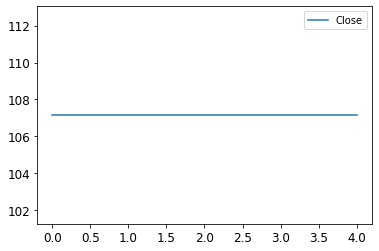

In [13]:
current[['Close']].plot()

### HBL OPEN PRICE PLOT

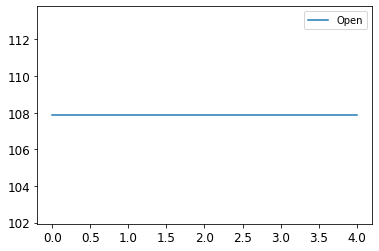

In [14]:
current[['Open']].plot()

In [15]:
current=current.drop('Unnamed: 0',axis=1)
current=current.iloc[-1]


In [16]:
from __future__ import division
def Advice(threshold,current=current):
    close=float(current['Close'])
    open=float(current['Open'])
    percentage = '{0:.2f}'.format((close / open * 100))
    if(close<open*threshold*0.01):
        print("Warning")
        print("The Current Price is Going Below: "+str(threshold)+"%")
        print("Open: "+str(open))
        print("Current: "+str(close))
        print("The Current Price is Going "+percentage+"% of Open Price")
    elif (float(percentage)==100.0):
        print("The Open and Current Price is Going Same")
        print("Open: "+str(open))
        print("Current: "+str(close))
        print("The Current Price is Going "+percentage+"% of Open Price")
    elif (float(percentage)>100.0):
        print("The Current Price is Going Up to Open Price")
        print("Open: "+str(open))
        print("Current: "+str(close))
        print("The Current Price is Going "+percentage+"% of Open Price")
    else:
        print("Status")
        print("Open: "+str(open))
        print("Current: "+str(close))
        print("The Current Price is Going "+percentage+"% of Open Price")
        

In [17]:
Advice(95)

Status
Open: 107.87
Current: 107.15
The Current Price is Going 99.33% of Open Price


### PREPROCESSING + PREDICTION

In [ ]:
        start=0
        total_data=len(final_df)
        # Currently doing prediction only for 1 step ahead
        steps_to_predict = 1

        #close, compund, neg, neu, pos, open, high, low, volume
        # Order -> 8,1,2,3,4,5,6,7,9
        yt = final_df.iloc[start:total_data,8] #close
        yt1 = final_df.iloc[start:total_data,1] #compund
        yt2 = final_df.iloc[start:total_data,2] #neg
        yt3 = final_df.iloc[start:total_data,3] #neu
        yt4 = final_df.iloc[start:total_data,4] #pos
        yt5 = final_df.iloc[start:total_data,5] #open
        yt6 = final_df.iloc[start:total_data,6] #high
        yt7 = final_df.iloc[start:total_data,7] #low
        vt = final_df.iloc[start:total_data,9] #volume
        yt_ = yt.shift(-1) #shifted close
        yt1_ = yt1.shift(-1) #shifted compund

       #taking only: close, next_close, compund, next_compund, volume, open, high, low
        data = pd.concat([yt, yt_, yt1, yt1_, vt, yt5, yt6, yt7], axis=1)
        data.columns = ['yt', 'yt_', 'yt1', 'yt1_','vt', 'yt5', 'yt6', 'yt7']

        data = data.dropna()
        # target variable - closed price
        # after shifting
        y = data['yt_'] #next_close

        # close, compund, next_compund, volume, open, high, low   
        cols = ['yt', 'yt1', 'yt1_', 'vt', 'yt5', 'yt6', 'yt7']
        x = data[cols]
        scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
        x = np.array(x).reshape((len(x) ,len(cols)))
        x = scaler_x.fit_transform(x)

        scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
        y = np.array (y).reshape ((len( y), 1))
        y = scaler_y.fit_transform (y)
        X_test = x[0: len(x),]    
        y_test = y[0: len(y)]
        X_test = X_test.reshape(X_test.shape + (1,))
        
        pred = model.predict(X_test) 
        pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

        prediction_data = pred[-1]     

        print ("Inputs: {}".format(model.input_shape))
        print ("Outputs: {}".format(model.output_shape))
        print ("Actual input: {}".format(X_test.shape))
        print ("Actual output: {}".format(y_test.shape))

        print ("prediction data:")
        print (prediction_data)

        print ("actual data")
        X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
        print (X_test)
        #########################################################################
        '''Plotting'''
        plt.plot(pred, label="predictions")

        y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
        plt.plot([row[0] for row in y_test], label="actual")

        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

        ax = plt.axes()
        ax.yaxis.set_major_formatter(tick)
        plt.show()
        plt.clf()
        X_test = x[0: len(x),]    
        y_test = y[0: len(y)]
        X_test = X_test.reshape(X_test.shape + (1,))
       
        score_test = model.evaluate(X_test, y_test, batch_size =1)
        print("in test MSE = ", (score_test) )

Series([], Name: Positive, dtype: object)

In [ ]:
print("The Model Predicts the Next Closing Price: ")
print(prediction_data)
Advice(98)